In [5]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, r'C:\Users\Admin\Documents\before_github\SymSC_Python_Norm2')
from Objects import JJ, R,Sine_current, Pulses, L,Ib, Square_pulse, MutualInductance
from FunctionCompiler import *

In [257]:
L1 = L.L(loc=[1,2],val=2.5)
L2 = L.L(loc=[2,3],val=11.67)
L3 = L.L(loc=[5,4],val=1.667)
L4 = L.L(loc=[3,6],val=0.05)

JJ1 = JJ.JJ(loc=[2,0],A=0.92, c=0)
JJ2 = JJ.JJ(loc=[3,0],A=0.68,c=0)
JJ3 = JJ.JJ(loc=[4,3],A=0.64,c=0)

Ib1 = Ib.Ib(loc=[2],val=0.5)
R_out = R.R(loc=[6,0],r=0.01)

val_input = 3
pulse_1 = Pulses.Pulses(loc=[1], A = val_input, t0 = 160, D=20,T=5000)
pulse_2 = Pulses.Pulses(loc=[1], A = val_input, t0 = 260,D=20,T=5000)
pulse_3 = Pulses.Pulses(loc=[1], A = val_input, t0 = 360,D=20,T=5000)
pulse_D = np.array([pulse_1, pulse_2])

val = 5

pulse_clk_1 = Pulses.Pulses(loc=[5], A = val, t0 = 400,D=20,T=5000)
pulse_clk_2 = Pulses.Pulses(loc=[5], A = val, t0 = 430,D=20,T=5000)
pulse_clk_3 = Pulses.Pulses(loc=[5], A = val, t0 = 460,D=20,T=5000)
pulse_clk_4 = Pulses.Pulses(loc=[5], A = val, t0 = 480+200,D=10,T=5000)
pulse_CLK = np.array([pulse_clk_1,pulse_clk_2, pulse_clk_3])

t = np.arange(0, 1000, 0.1)
fc = FunctionCompiler([*pulse_D,*pulse_CLK, L1, L2, L3, L4, JJ1, JJ2, JJ3, Ib1, R_out],t)

sol = fc.solve()
#fc.object_dict

Generated objects are: Pulses1 Pulses2 Pulses3 Pulses4 Pulses5 L1 L2 L3 L4 JJ1 JJ2 JJ3 Ib1 R1


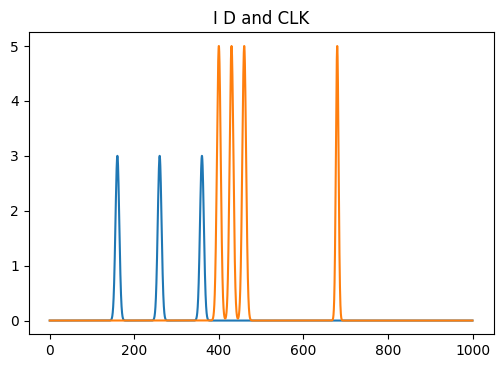

In [258]:
fig, ax = plt.subplots(dpi=100)
plt.title("I D and CLK")
ax.plot(t,pulse_1.get_data("I",t,sol)+pulse_2.get_data("I",t,sol)+pulse_3.get_data("I",t,sol))
ax.plot(t,pulse_clk_1.get_data("I",t,sol)+pulse_clk_2.get_data("I",t,sol)+pulse_clk_3.get_data("I",t,sol)+pulse_clk_4.get_data("I",t,sol))

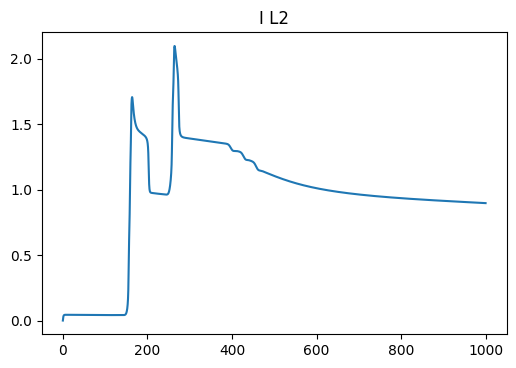

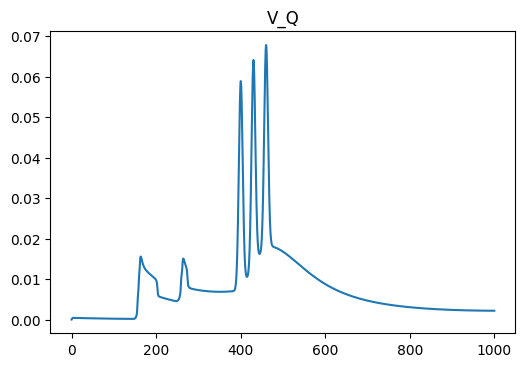

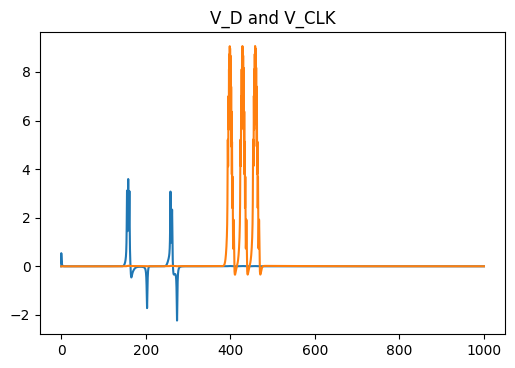

In [259]:
fig, ax = plt.subplots(dpi=100)
plt.title("I L2")
ax.plot(t,L2.get_data("I",t,sol))
fig, ax = plt.subplots(dpi=100)
plt.title("V_Q")
ax.plot(t,R_out.get_data("V",t,sol))

fig, ax = plt.subplots(dpi=100)
plt.title("V_D and V_CLK")
ax.plot(t,JJ1.get_data("V",t,sol))
ax.plot(t,L3.get_data("V",t,sol)+JJ3.get_data("V",t,sol)+JJ2.get_data("V",t,sol))


In [ ]:
### plt.plot(t,)